In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from data_utils import load_yfinance
from indicators import transform
import polars as pl

sns.set_theme()
plt.rcParams["figure.dpi"] = 300

In [3]:
# df = load_daily_crsp_file(date(2023, 1, 1))
df = load_yfinance(["AAPL", "AMZN"], date(2023, 1, 1))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [12]:
df.head()

date,ticker,close,high,low,open,volume
date,cat,f64,f64,f64,f64,i64
2023-01-03,"""AAPL""",123.632523,129.39551,122.742865,128.782641,112117500
2023-01-03,"""AMZN""",85.82,86.959999,84.209999,85.459999,76706000
2023-01-04,"""AAPL""",124.9077,127.181268,123.642412,125.431607,89113600
2023-01-04,"""AMZN""",85.139999,86.980003,83.360001,86.550003,68885100
2023-01-05,"""AAPL""",123.583115,126.301508,123.326108,125.668865,80962700


In [13]:
res = transform(df)

In [14]:
res.head()

close,high,low,open,volume,rsi_6,william_6,mfi_6,macd_6,ppo_6,roc_6,cmo_6,sma_6,ema_6,wma_6,tema_6,cci_6,dmi_6,psar_6,rsi_7,william_7,mfi_7,macd_7,ppo_7,roc_7,cmo_7,sma_7,ema_7,wma_7,tema_7,cci_7,dmi_7,psar_7,rsi_8,william_8,mfi_8,macd_8,…,sma_25,ema_25,wma_25,tema_25,cci_25,dmi_25,psar_25,rsi_26,william_26,mfi_26,macd_26,ppo_26,roc_26,cmo_26,sma_26,ema_26,wma_26,tema_26,cci_26,dmi_26,psar_26,rsi_27,william_27,mfi_27,macd_27,ppo_27,roc_27,cmo_27,sma_27,ema_27,wma_27,tema_27,cci_27,dmi_27,psar_27,date,ticker
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,date,cat
0.342968,0.337303,0.345633,0.331788,0.072804,0.399849,0.175679,0.163546,0.417892,0.516076,0.366303,0.399849,0.348065,0.342045,0.333521,0.22329,0.246117,0.058843,0.333129,0.422311,0.089959,0.0,0.438254,0.226543,0.001345,0.422311,0.345979,0.338767,0.329074,0.207354,0.26857,0.118908,0.327541,0.441444,0.302416,0.0,0.457954,…,0.262202,0.253599,0.232518,0.003097,0.496228,0.416527,0.327541,0.621648,0.64842,0.0,0.610922,0.769851,0.001021,0.621648,0.257029,0.247828,0.226433,0.0,0.502796,0.444724,0.327541,0.623957,0.677914,0.0,0.62106,0.783271,0.001205,0.623957,0.251631,0.242552,0.221426,0.0,0.508183,0.454738,0.327541,2023-04-26,"""AAPL"""
0.383933,0.366646,0.366913,0.350764,0.138661,0.718439,0.973851,0.210337,0.461096,0.507546,0.471663,0.718439,0.349265,0.351901,0.341591,0.251355,0.805616,0.502202,0.336116,0.696835,0.2044,0.0,0.471744,0.230094,0.001842,0.696835,0.348565,0.347399,0.335856,0.232409,0.707008,0.492449,0.328962,0.681087,0.880664,0.0,0.484489,…,0.26674,0.258573,0.237024,0.01258,0.631291,0.501541,0.328962,0.716534,1.0,0.0,0.612297,0.768593,0.001156,0.716534,0.260821,0.252808,0.230931,0.009278,0.62893,0.52819,0.328962,0.715694,1.0,0.0,0.622527,0.786855,0.001296,0.715694,0.256059,0.247536,0.225959,0.009062,0.627814,0.534133,0.328962,2023-04-27,"""AAPL"""
0.395121,0.378186,0.390864,0.380163,0.105762,0.766763,0.975784,0.386686,0.501158,0.504861,0.539756,0.766763,0.353923,0.362291,0.352676,0.274112,0.84219,0.604654,0.336455,0.742652,0.186878,0.0,0.505131,0.226968,0.001849,0.742652,0.351298,0.356839,0.344968,0.254349,0.801645,0.586249,0.331223,0.724032,0.792133,0.0,0.512593,…,0.271351,0.264211,0.242256,0.024196,0.695025,0.531959,0.331223,0.739887,0.977539,0.0,0.615518,0.771195,0.001338,0.739887,0.265742,0.258434,0.236193,0.02065,0.687678,0.558189,0.331223,0.738374,0.977272,0.0,0.625756,0.791279,0.001227,0.738374,0.260242,0.253149,0.231187,0.020175,0.684435,0.562786,0.331223,2023-04-28,"""AAPL"""
0.394328,0.383553,0.39763,0.387201,0.096475,0.757027,0.887112,0.565072,0.520169,0.512824,0.587632,0.757027,0.36095,0.369476,0.362187,0.284297,0.735396,0.648475,0.342565,0.734308,0.173202,0.0,0.522371,0.230632,0.001983,0.734308,0.355217,0.363708,0.353181,0.265514,0.730668,0.626768,0.33498,0.716748,0.72303,0.0,0.527902,…,0.275357,0.269341,0.247043,0.033496,0.698541,0.545905,0.33498,0.736727,0.92328,0.0,0.617211,0.771217,0.001248,0.736727,0.270169,0.263571,0.241002,0.029818,0.692553,0.571955,0.33498,0.7353,0.922367,0.0,0.627521,0.795208,0.001331,0.7353,0.264971,0.258292,0.236033,0.029189,0.689243,0.575944,0.33498,2023-05-01,"""AAPL"""
0.385079,0.382659,0.387836,0.394418,0.082739,0.64045,0.749288,0.551623,0.513014,0.508523,0.545968,0.64045,0.365885,0.371837,0.366905,0.281335,0.632307,0.371675,0.349788,0.634606,0.159072,0.0,0.51776,0.233575,0.002087,0.634606,0.359909,0.366409,0.357946,0.264368,0.631688,0.390762,0.339837,0.629865,0.651632,0.0,0.524611,…,0.279757,0.273211,0.250609,0.037904,0.654285,0.485143,0.339837,0.699458,0.852935,0.0,0.615303,0.770861,0.001096,0.699458,0.273611,0.267488,0.244596,0.034267,0.649345,0.511754,0.339837,0.699062,0.851186,0.0,0.625827,0.79337,0.001189,0.699062,0.268836,0.262253,0.239679,0.03366,0.648409,0.518158,0.339837

In [25]:
img = res.filter(pl.col("ticker") == "AAPL").drop("ticker", "date").to_numpy()

In [33]:
img.sum(axis=1).argmax()

np.int64(302)

In [34]:
img[302, :]

array([0.96653164, 0.95780849, 0.95095834, 0.93560513, 0.13094115,
       0.94086476, 0.99441472, 1.        , 0.95036355, 0.8606376 ,
       0.82513152, 0.94086476, 0.92399127, 0.92651116, 0.93688774,
       0.95795793, 0.80354625, 0.93010871, 0.78489944, 0.9212781 ,
       0.15985794, 0.        , 0.96666385, 0.30472906, 0.00310743,
       0.9212781 , 0.91422241, 0.91997092, 0.93047186, 0.95496321,
       0.74830349, 0.91181625, 0.78945395, 0.90452072, 0.65430937,
       0.        , 0.98465498, 0.28512215, 0.00257724, 0.90452072,
       0.90007418, 0.91390771, 0.92385211, 0.95206125, 0.75059806,
       0.89689937, 0.78945395, 0.88897581, 0.59270618, 0.        ,
       1.        , 0.28521971, 0.00252327, 0.88897581, 0.89113892,
       0.90806791, 0.91777189, 0.94934858, 0.77001693, 0.88465227,
       0.78945395, 0.87443694, 0.57388374, 0.        , 0.99701932,
       0.30123735, 0.00290335, 0.87443694, 0.88308609, 0.90239135,
       0.91200269, 0.94670694, 0.77004129, 0.87449012, 0.78945

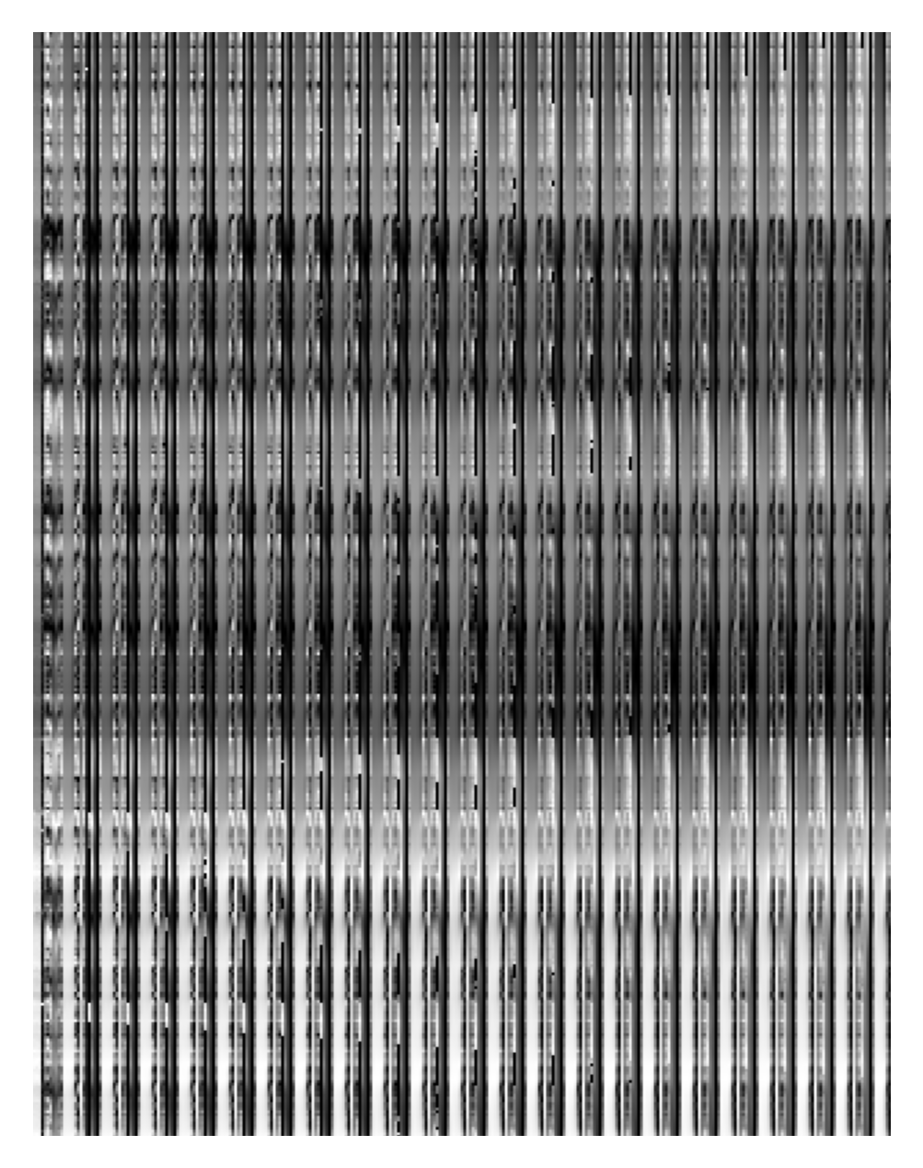

In [41]:
plt.imshow(img, cmap="gray")
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [42]:
# Save image
plt.imsave("img.png", img, cmap="gray")